# Week 2: Sales & Customer Behaviour Insights – Green Cart Ltd.

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Cleaning

In [2]:
sales_data = pd.read_csv("sales_data.csv")
product_info = pd.read_csv("product_info.csv")
customer_info = pd.read_csv("customer_info.csv")

### Cleaning Sales Data

In [3]:
sales_data.tail(10)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
2990,O584546,C00250,P0030,3,34.37,30-05-2025,Delayed,Credit Card,Central,0.00
2991,O979543,C00174,P0028,5,35.49,30-05-2025,delivered,Bank Transfer,North,0.05
2992,O834685,C00262,P0012,1,37.27,30-05-2025,Delivered,Bank Transfer,North,0.20
2993,O517776,C00138,P0024,3,17.92,10-05-2025,Cancelled,credit card,North,0.15
2994,O650396,C00298,P0005,2,21.88,11-05-2025,Delayed,Bank Transfer,Central,0.20
2995,O868860,C00233,P0001,5,43.40,29-05-2025,Delivered,Bank Transfer,West,0.20
2996,O949709,C00246,P0029,4,34.04,29-05-2025,DELAYED,Bank Transfer,West,0.20
2997,O763639,C00182,P0026,1,42.34,29-05-2025,Delivered,credit card,South,0.00
2998,O753958,C00074,P0003,5,35.96,29-05-2025,Delivered,Credit Card,Central,0.00
2999,O929624,C00405,P0004,3,43.23,09-05-2025,delivered,Credit Card,West,0.10


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [5]:
sales_data.isna().sum() # check for missing values

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            2
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

In [6]:
# converting data types
sales_data["order_date"] = pd.to_datetime(sales_data.loc[:,"order_date"], format="%d-%m-%Y")
sales_data["quantity"] = pd.to_numeric(sales_data.loc[:,"quantity"], errors='coerce')

In [7]:
# deal with some missing values
sales_data.loc[:,"discount_applied"] = sales_data.loc[:,"discount_applied"].fillna(0.00) # assume missing discount means 0 discount
sales_data.loc[:,"order_date"] = sales_data.loc[:,"order_date"].bfill() # dates not in order, just take the previous one
sales_data.loc[:,"quantity"] = sales_data.loc[:,"quantity"].interpolate() # interpolate the quantity

In [8]:
sales_data.isna().sum()

order_id            1
customer_id         2
product_id          5
quantity            0
unit_price          1
order_date          0
delivery_status     3
payment_method      3
region              0
discount_applied    0
dtype: int64

In [9]:
# only one missing unit price, deal with it manually
sales_data[sales_data["unit_price"].isna()]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
496,O837867,C00350,P0028,4.0,NaN,2025-08-03,delivered,Credit Card,East,0.15


In [10]:
sales_data[sales_data["product_id"] == "P0028"]

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
33,O966135,C00464,P0028,1.0,26.29,2025-07-15,Cancelled,PayPal,West,0.00
82,O429017,C00131,P0028,5.0,24.03,2025-05-27,delivered,Bank Transfer,North,0.00
188,O893072,C00127,P0028,4.0,47.02,2025-07-20,delivered,Bank Transfer,Central,0.00
219,O550663,C00095,P0028,2.0,44.90,2025-08-20,Delivered,PayPal,East,0.05
225,O539949,C00343,P0028,5.0,13.47,2025-08-23,DELAYED,Bank Transfer,North,0.15
...,...,...,...,...,...,...,...,...,...,...
2922,O454790,C00343,P0028,4.0,27.38,2025-05-23,Delayed,PayPal,South,0.00
2934,O651929,C00210,P0028,4.0,39.45,2025-05-21,Delayed,credit card,South,0.20
2951,O766237,C00139,P0028,1.0,27.21,2025-05-17,delivered,Credit Card,Central,0.00
2953,O450828,C00480,P0028,5.0,16.59,2025-06-05,DELAYED,PayPal,Central,0.00


In [11]:
# missing unit price could not be determined by looking at product id prices (looks almost random), so use the base price from product_info
product_info[product_info["product_id"]=="P0028"]

,product_id,product_name,category,launch_date,base_price,supplier_code
27,P0028,Outdoors Product 53,Outdoors,10-04-25,34.28,S587


In [12]:
sales_data.loc[496,'unit_price'] = 34.28
sales_data.loc[496,]

order_id                        O837867
customer_id                      C00350
product_id                        P0028
quantity                            4.0
unit_price                        34.28
order_date          2025-08-03 00:00:00
delivery_status               delivered
payment_method              Credit Card
region                             East
discount_applied                   0.15
Name: 496, dtype: object

In [13]:
# categorical data, fill missing values with unknown
sales_data.loc[:,"delivery_status"] = sales_data.loc[:,"delivery_status"].fillna("Unknown")
sales_data.loc[:,"payment_method"] = sales_data.loc[:,"payment_method"].fillna("Unknown")

In [14]:
# standardise string formatting
sales_data["delivery_status"] = sales_data["delivery_status"].str.title().str.strip()
sales_data["payment_method"] = sales_data["payment_method"].str.title().str.strip()
sales_data["region"] = sales_data["region"].str.title().str.strip()

In [15]:
# convert column data type
sales_data["delivery_status"] = sales_data["delivery_status"].astype("category")
sales_data["payment_method"] = sales_data["payment_method"].astype("category")
sales_data["region"] = sales_data["region"].astype("category")

In [16]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2999 non-null   object        
 1   customer_id       2998 non-null   object        
 2   product_id        2995 non-null   object        
 3   quantity          3000 non-null   float64       
 4   unit_price        3000 non-null   float64       
 5   order_date        3000 non-null   datetime64[ns]
 6   delivery_status   3000 non-null   category      
 7   payment_method    3000 non-null   category      
 8   region            3000 non-null   category      
 9   discount_applied  3000 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 173.6+ KB


In [17]:
# check for errant entries in categorical columns
print(sales_data["delivery_status"].cat.categories)
print(sales_data["payment_method"].cat.categories)
print(sales_data["region"].cat.categories)

Index(['Cancelled', 'Delayed', 'Delivered', 'Delrd', 'Delyd', 'Unknown'], dtype='object')
Index(['Bank Transfer', 'Bank Transfr', 'Credit Card', 'Paypal', 'Unknown'], dtype='object')
Index(['Central', 'East', 'North', 'Nrth', 'South', 'West'], dtype='object')


In [18]:
# fixing entries
sales_data.loc[sales_data[sales_data["delivery_status"]=="Delrd"].index,"delivery_status"] = "Delayed"
sales_data.loc[sales_data[sales_data["delivery_status"]=="Delyd"].index,"delivery_status"] = "Delayed"

In [19]:
sales_data["delivery_status"] = sales_data["delivery_status"].cat.remove_unused_categories()
sales_data["delivery_status"].cat.categories

Index(['Cancelled', 'Delayed', 'Delivered', 'Unknown'], dtype='object')

In [20]:
sales_data.loc[sales_data[sales_data["payment_method"]=="Bank Transfr"].index,"payment_method"] = "Bank Transfer"

In [21]:
sales_data["payment_method"] = sales_data["payment_method"].cat.remove_unused_categories()
sales_data["payment_method"].cat.categories

Index(['Bank Transfer', 'Credit Card', 'Paypal', 'Unknown'], dtype='object')

In [22]:
sales_data.loc[sales_data[sales_data["region"]=="Nrth"].index,"region"] = "North"

In [23]:
sales_data["region"] = sales_data["region"].cat.remove_unused_categories()
sales_data["region"].cat.categories

Index(['Central', 'East', 'North', 'South', 'West'], dtype='object')

In [24]:
sales_data.isna().sum() # check for remaining missing values

order_id            1
customer_id         2
product_id          5
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64

In [25]:
# all remaining missing values are primary/foreign keys and make up a small proportion of the overall data. better to drop rows than ascribe wrong information
sales_data = sales_data.dropna()

In [26]:
# ensure numeric columns are non-negative
print(sales_data[sales_data["quantity"] < 0])
print(sales_data[sales_data["unit_price"] < 0])
print(sales_data[sales_data["discount_applied"] < 0])

Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, delivery_status, payment_method, region, discount_applied]
Index: []
Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, delivery_status, payment_method, region, discount_applied]
Index: []
Empty DataFrame
Columns: [order_id, customer_id, product_id, quantity, unit_price, order_date, delivery_status, payment_method, region, discount_applied]
Index: []


In [27]:
# check for duplicates on the primary key
sales_data.duplicated(subset="order_id").sum()

2

In [28]:
sales_data_clean = sales_data.drop_duplicates(subset="order_id")

In [29]:
sales_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2990 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2990 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2990 non-null   object        
 3   quantity          2990 non-null   float64       
 4   unit_price        2990 non-null   float64       
 5   order_date        2990 non-null   datetime64[ns]
 6   delivery_status   2990 non-null   category      
 7   payment_method    2990 non-null   category      
 8   region            2990 non-null   category      
 9   discount_applied  2990 non-null   float64       
dtypes: category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 195.7+ KB


In [30]:
sales_data_clean.head(10)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1.0,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1.0,47.62,2025-07-08,Delayed,Credit Card,West,0.20
5,O190175,C00388,P0005,3.0,37.89,2025-07-10,Delayed,Bank Transfer,North,0.10
6,O272646,C00328,P0027,5.0,30.83,2025-07-12,Delivered,Paypal,Central,0.05
7,O411881,C00201,P0019,3.0,12.56,2025-07-14,Delivered,Credit Card,East,0.00
8,O170570,C00076,P0030,3.0,28.32,2025-07-16,Delivered,Paypal,Central,0.15
9,O619944,C00330,P0002,1.0,30.96,2025-07-18,Delayed,Credit Card,South,0.15


### Cleaning Product Info

In [31]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


In [32]:
product_info # only 30 rows, print all of them to see

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559
5,P0006,Cleaning Product 16,Cleaning,09-10-24,36.06,S980
6,P0007,Personal Care Product 64,Personal Care,30-09-24,33.63,S379
7,P0008,Storage Product 47,Storage,29-08-24,31.96,S788
8,P0009,Outdoors Product 13,Outdoors,18-04-25,8.00,S695
9,P0010,Cleaning Product 70,Cleaning,14-08-24,17.72,S321


In [33]:
product_info.isna().sum() # double check for missing values

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

In [34]:
# convert column data types
product_info["launch_date"] = pd.to_datetime(product_info.loc[:,"launch_date"], format="%d-%m-%y")
product_info["category"] = product_info.loc[:,"category"].astype("category")

In [35]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     30 non-null     object        
 1   product_name   30 non-null     object        
 2   category       30 non-null     category      
 3   launch_date    30 non-null     datetime64[ns]
 4   base_price     30 non-null     float64       
 5   supplier_code  30 non-null     object        
dtypes: category(1), datetime64[ns](1), float64(1), object(3)
memory usage: 1.5+ KB


In [36]:
product_info["category"].cat.categories # double check for errant categories

Index(['Cleaning', 'Kitchen', 'Outdoors', 'Personal Care', 'Storage'], dtype='object')

In [37]:
# double check for duplicate primary keys
product_info.duplicated(subset="product_id").sum()

0

No other issues spotted.

In [38]:
product_info_clean = product_info.copy()

### Cleaning Customer Info

In [39]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [40]:
customer_info.head(10)

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze
5,C00006,wyattmichelle@yahoo.com,21-10-24,male,Central,bronze
6,C00007,francisco53@hotmail.com,17-10-24,FEMALE,North,gold
7,C00008,amandasanchez@gray-mayo.net,29-09-24,male,Central,gold
8,C00009,perezantonio@yahoo.com,08-12-24,FEMALE,South,Silver
9,C00010,clarksherri@hotmail.com,05-11-24,male,East,GOLD


In [41]:
# check for missing values
customer_info.isna().sum()

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64

In [42]:
customer_info[customer_info["customer_id"].isna()]

,customer_id,email,signup_date,gender,region,loyalty_tier
253,NaN,mark16@parker.com,22-02-25,femle,South,bronze
371,NaN,ohayes@gmail.com,09-12-24,Other,Central,Silver
470,NaN,nancygonzalez@wright.com,27-06-25,Male,Central,Silver


In [43]:
customer_info[250:255]

,customer_id,email,signup_date,gender,region,loyalty_tier
250,C00251,ghernandez@gmail.com,10-11-24,Male,North,GOLD
251,C00252,phillipjensen@yahoo.com,21-02-25,NaN,North,bronze
252,C00253,terickson@yahoo.com,18-05-25,male,East,gold
253,NaN,mark16@parker.com,22-02-25,femle,South,bronze
254,C00255,tammy99@gmail.com,12-04-25,Female,North,gold


In [44]:
customer_info[368:375]

,customer_id,email,signup_date,gender,region,loyalty_tier
368,C00369,taylorkaren@yahoo.com,27-06-25,Other,West,bronze
369,C00370,michelle22@thomas.com,27-04-25,Female,East,GOLD
370,C00371,othomas@yahoo.com,06-03-25,Other,North,Silver
371,NaN,ohayes@gmail.com,09-12-24,Other,Central,Silver
372,C00373,shawn75@hotmail.com,06-07-24,male,Central,gold
373,C00374,sreid@horn-flynn.biz,28-09-24,FEMALE,North,GOLD
374,C00375,troymorris@yahoo.com,14-11-24,Other,West,Silver


In [45]:
customer_info[467:473]

,customer_id,email,signup_date,gender,region,loyalty_tier
467,C00468,joseph69@hotmail.com,09-08-24,femle,North,GOLD
468,C00469,alewis@washington.com,22-01-25,Female,North,Silver
469,C00470,NaN,17-07-24,femle,North,Silver
470,NaN,nancygonzalez@wright.com,27-06-25,Male,Central,Silver
471,C00472,joshuacolon@hotmail.com,07-12-24,Male,South,Silver
472,C00473,allentracy@thompson-harrell.org,05-02-25,male,North,bronze


In [46]:
# customer ids seem to be in order, replace them with missing values
customer_info.loc[253,"customer_id"] = "C00254"
customer_info.loc[371,"customer_id"] = "C00372"
customer_info.loc[470,"customer_id"] = "C00471"

In [47]:
# fill categorical missing values with unknown
customer_info["gender"] = customer_info["gender"].fillna("Unknown")
customer_info["region"] = customer_info["region"].fillna("Unknown")
customer_info["loyalty_tier"] = customer_info["loyalty_tier"].fillna("Unknown")

# fill missing dates by backfilling
customer_info["signup_date"] = customer_info["signup_date"].bfill()

# fill missing emails with unknown email
customer_info["email"] = customer_info["email"].fillna("unknown_fill@unknown_fill.com") # we will extract email domain later, so fill should be in email format

In [48]:
# standardise string formatting
customer_info["gender"] = customer_info["gender"].str.title().str.strip()
customer_info["region"] = customer_info["region"].str.title().str.strip()
customer_info["loyalty_tier"] = customer_info["loyalty_tier"].str.title().str.strip()

In [49]:
# convert column data types
customer_info["signup_date"] = pd.to_datetime(customer_info.loc[:,"signup_date"], format="%d-%m-%y")
customer_info["gender"] = customer_info["gender"].astype("category")
customer_info["region"] = customer_info["region"].astype("category")
customer_info["loyalty_tier"] = customer_info["loyalty_tier"].astype("category")

In [50]:
# check for errant entries
customer_info["gender"].cat.categories

Index(['Female', 'Femle', 'Male', 'Other', 'Unknown'], dtype='object')

In [51]:
# fix errant entries
customer_info.loc[customer_info[customer_info["gender"]=="Femle"].index,"gender"] = "Female"


In [52]:
customer_info["gender"] = customer_info["gender"].cat.remove_unused_categories()
customer_info["gender"].cat.categories

Index(['Female', 'Male', 'Other', 'Unknown'], dtype='object')

In [53]:
customer_info["region"].cat.categories

Index(['Central', 'East', 'North', 'South', 'Unknown', 'West'], dtype='object')

In [54]:
customer_info["loyalty_tier"].cat.categories

Index(['Brnze', 'Bronze', 'Gld', 'Gold', 'Silver', 'Sllver', 'Unknown'], dtype='object')

In [55]:
customer_info.loc[customer_info[customer_info["loyalty_tier"]=="Brnze"].index,"loyalty_tier"] = "Bronze"
customer_info.loc[customer_info[customer_info["loyalty_tier"]=="Gld"].index,"loyalty_tier"] = "Gold"
customer_info.loc[customer_info[customer_info["loyalty_tier"]=="Sllver"].index,"loyalty_tier"] = "Silver"

In [56]:
customer_info["loyalty_tier"] = customer_info["loyalty_tier"].cat.remove_unused_categories()
customer_info["loyalty_tier"].cat.categories

Index(['Bronze', 'Gold', 'Silver', 'Unknown'], dtype='object')

In [57]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   500 non-null    object        
 1   email         500 non-null    object        
 2   signup_date   500 non-null    datetime64[ns]
 3   gender        500 non-null    category      
 4   region        500 non-null    category      
 5   loyalty_tier  500 non-null    category      
dtypes: category(3), datetime64[ns](1), object(2)
memory usage: 13.6+ KB


In [58]:
# check for duplicate primary keys
customer_info.duplicated(subset="customer_id").sum()

0

No other issues spotted

In [107]:
# Adding feature here for convenience later
customer_info["signup_month"] = customer_info["signup_date"].dt.to_period("M")

In [108]:
customer_info.head(10)

,customer_id,email,signup_date,gender,region,loyalty_tier,signup_month
0,C00001,shaneramirez@gmail.com,2025-04-26,Male,Central,Silver,2025-04
1,C00002,jpeterson@bernard.com,2024-08-11,Female,Central,Gold,2024-08
2,C00003,howardmaurice@yahoo.com,2025-05-15,Male,Central,Gold,2025-05
3,C00004,yherrera@arnold.org,2025-06-14,Female,Central,Gold,2025-06
4,C00005,janetwilliams@gmail.com,2025-05-02,Male,West,Bronze,2025-05
5,C00006,wyattmichelle@yahoo.com,2024-10-21,Male,Central,Bronze,2024-10
6,C00007,francisco53@hotmail.com,2024-10-17,Female,North,Gold,2024-10
7,C00008,amandasanchez@gray-mayo.net,2024-09-29,Male,Central,Gold,2024-09
8,C00009,perezantonio@yahoo.com,2024-12-08,Female,South,Silver,2024-12
9,C00010,clarksherri@hotmail.com,2024-11-05,Male,East,Gold,2024-11


In [109]:
customer_info_clean = customer_info.copy()

## Merging Dataframes

In [110]:
temp_frame = pd.merge(sales_data_clean, product_info_clean, how="left", on="product_id")
merged_df = pd.merge(temp_frame, customer_info_clean, how="left", on="customer_id")

In [111]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2990 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2990 non-null   object        
 3   quantity          2990 non-null   float64       
 4   unit_price        2990 non-null   float64       
 5   order_date        2990 non-null   datetime64[ns]
 6   delivery_status   2990 non-null   category      
 7   payment_method    2990 non-null   category      
 8   region_x          2990 non-null   category      
 9   discount_applied  2990 non-null   float64       
 10  product_name      2990 non-null   object        
 11  category          2990 non-null   category      
 12  launch_date       2990 non-null   datetime64[ns]
 13  base_price        2990 non-null   float64       
 14  supplier_code     2990 n

In [63]:
# rename region column for clarity
merged_df.rename({"region_x": "order_region", "region_y": "customer_region", "category": "product_category"}, axis=1, inplace=True)

In [64]:
merged_df.head(10)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,order_region,discount_applied,product_name,product_category,launch_date,base_price,supplier_code,email,signup_date,gender,customer_region,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924,jacquelinemartin@mills-logan.com,2024-09-08,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-08-06,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Female,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-07-08,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold
5,O190175,C00388,P0005,3.0,37.89,2025-07-10,Delayed,Bank Transfer,North,0.10,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559,abbottdominique@yahoo.com,2024-09-23,Male,North,Gold
6,O272646,C00328,P0027,5.0,30.83,2025-07-12,Delivered,Paypal,Central,0.05,Outdoors Product 55,Outdoors,2024-09-21,23.05,S127,adamsnorman@moore.com,2024-07-08,Female,Central,Gold
7,O411881,C00201,P0019,3.0,12.56,2025-07-14,Delivered,Credit Card,East,0.00,Kitchen Product 42,Kitchen,2024-07-17,30.30,S993,christopher24@whitehead-hernandez.biz,2024-08-10,Female,East,Gold
8,O170570,C00076,P0030,3.0,28.32,2025-07-16,Delivered,Paypal,Central,0.15,Cleaning Product 72,Cleaning,2025-04-04,9.77,S455,jeffrey10@herring.com,2025-03-04,Female,North,Gold
9,O619944,C00330,P0002,1.0,30.96,2025-07-18,Delayed,Credit Card,South,0.15,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974,ryanhawkins@russell.com,2025-02-22,Other,West,Bronze


## Feature Engineering

In [112]:
merged_df["revenue"] = merged_df["quantity"] * merged_df["unit_price"] * (1 - merged_df["discount_applied"])
merged_df["order_week"] = merged_df["order_date"].dt.isocalendar().week
merged_df["price_band"] = pd.cut(merged_df["unit_price"], bins=[-np.inf, 15, 30, np.inf], labels=["Low", "Medium", "High"])
merged_df["days_to_order"] = merged_df["order_date"] - merged_df["launch_date"]
merged_df["email_domain"] = merged_df["email"].apply(lambda x: x.split("@")[1])
merged_df["is_late"] = (merged_df["delivery_status"].apply(lambda x: "True" if x=="Delayed" else "False")).astype("category")

In [66]:
merged_df.head(10)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,order_region,discount_applied,...,gender,customer_region,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,Female,North,Silver,117.7500,27,High,275 days,mills-logan.com,False,2024-09
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit Card,North,0.00,...,Other,North,Gold,94.6000,27,Medium,169 days,morgan.com,True,2024-08
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,Male,Central,Gold,25.2280,28,Medium,104 days,walters-smith.com,False,2024-09
3,O501803,C00031,P0003,1.0,32.76,2025-07-08,Cancelled,Credit Card,Central,0.20,...,Female,Central,Gold,26.2080,28,High,358 days,gmail.com,False,2024-07
4,O322242,C00495,P0016,1.0,47.62,2025-07-08,Delayed,Credit Card,West,0.20,...,Male,Central,Gold,38.0960,28,High,138 days,hotmail.com,True,2024-09
5,O190175,C00388,P0005,3.0,37.89,2025-07-10,Delayed,Bank Transfer,North,0.10,...,Male,North,Gold,102.3030,28,High,263 days,yahoo.com,True,2024-09
6,O272646,C00328,P0027,5.0,30.83,2025-07-12,Delivered,Paypal,Central,0.05,...,Female,Central,Gold,146.4425,28,High,294 days,moore.com,False,2024-07
7,O411881,C00201,P0019,3.0,12.56,2025-07-14,Delivered,Credit Card,East,0.00,...,Female,East,Gold,37.6800,29,Low,362 days,whitehead-hernandez.biz,False,2024-08
8,O170570,C00076,P0030,3.0,28.32,2025-07-16,Delivered,Paypal,Central,0.15,...,Female,North,Gold,72.2160,29,Medium,103 days,herring.com,False,2025-03
9,O619944,C00330,P0002,1.0,30.96,2025-07-18,Delayed,Credit Card,South,0.15,...,Other,West,Bronze,26.3160,29,High,334 days,russell.com,True,2025-02


In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2990 entries, 0 to 2989
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   order_id          2990 non-null   object         
 1   customer_id       2990 non-null   object         
 2   product_id        2990 non-null   object         
 3   quantity          2990 non-null   float64        
 4   unit_price        2990 non-null   float64        
 5   order_date        2990 non-null   datetime64[ns] 
 6   delivery_status   2990 non-null   category       
 7   payment_method    2990 non-null   category       
 8   order_region      2990 non-null   category       
 9   discount_applied  2990 non-null   float64        
 10  product_name      2990 non-null   object         
 11  product_category  2990 non-null   category       
 12  launch_date       2990 non-null   datetime64[ns] 
 13  base_price        2990 non-null   float64        
 14  supplier

## EDA and Summary Tables

Weekly revenue by region

In [68]:
weekly_revenue_by_region = merged_df.pivot_table(values="revenue", index="order_week", columns="order_region", aggfunc="sum", observed=False)
weekly_revenue_by_region

order_region,Central,East,North,South,West
order_week,,,,,
14,68.7600,70.1230,195.1840,0.0000,0.0000
15,16.0650,30.7300,210.8480,145.8600,59.6485
16,14.8480,247.4685,338.0900,138.4800,0.0000
17,0.0000,259.7590,0.0000,43.9280,174.6435
18,210.8545,1328.7480,1006.9245,569.2610,908.1610
19,1655.5365,1847.5625,1581.0750,2103.7175,1529.0280
20,1139.8890,2051.1295,1883.5340,2522.0530,1667.7340
21,1626.7645,1463.2255,3012.9960,3179.9090,2225.3110
22,2894.5105,2863.3770,2666.0295,3301.4775,3485.6190


In [69]:
weekly_revenue_by_region[6:21].median()

order_region
Central    3168.6660
East       2998.2335
North      2922.9335
South      3152.9365
West       2935.8040
dtype: float64

C:\Users\Josiah\AppData\Local\Temp\ipykernel_16488\2452666359.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(weekly_revenue_by_region, markers='o')


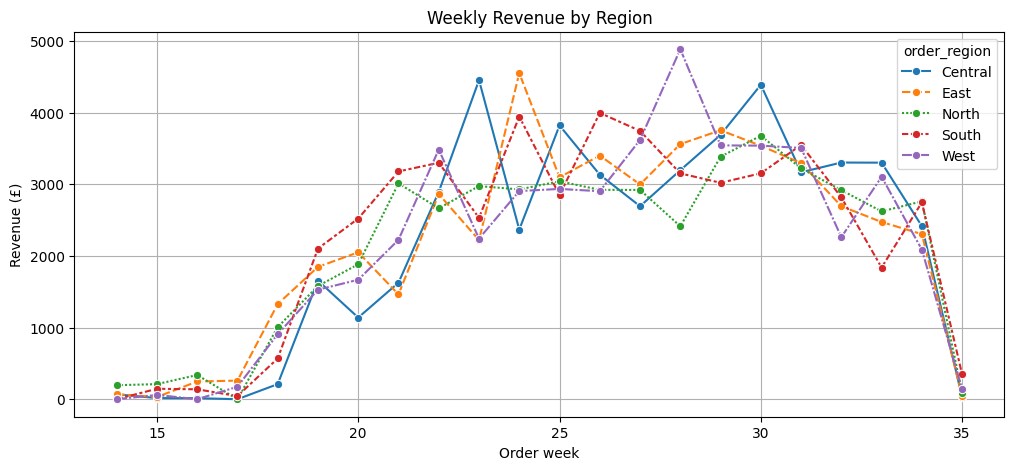

In [120]:
plt.figure(figsize=(12,5))
sns.lineplot(weekly_revenue_by_region, markers='o')
plt.grid(visible=True)
plt.xlabel("Order week")
plt.ylabel("Revenue (£)")
plt.title("Weekly Revenue by Region")
plt.show()

Product performance for each category measured by revenue, quantity and discount applied.

In [71]:
product_performance_revenue = merged_df.groupby("product_category", observed=False)["revenue"].agg(["min", "mean", "median", "max", "sum"]).sort_values("sum", ascending=False).reset_index()
product_performance_revenue

,product_category,min,mean,median,max,sum
0,Cleaning,6.9615,77.898138,65.040,248.30,93711.4605
1,Storage,7.7490,81.785637,66.860,249.35,47190.3125
2,Outdoors,6.8000,79.247771,68.867,247.55,40178.6200
3,Kitchen,7.7580,84.412129,73.472,249.15,33933.6760
4,Personal Care,7.5040,82.698593,70.944,248.10,24892.2765


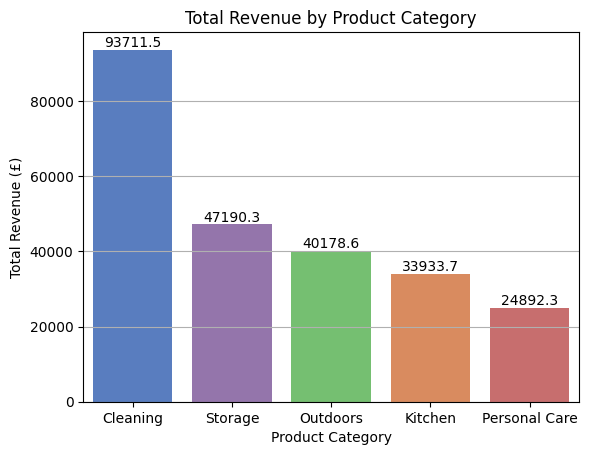

In [72]:
ax = sns.barplot(product_performance_revenue, x = "product_category", y="sum", order = product_performance_revenue["product_category"], palette="muted", hue="product_category", legend=False)
for container in ax.containers:
    ax.bar_label(container)

plt.xlabel("Product Category")
plt.ylabel("Total Revenue (£)")
plt.grid(axis="y")
plt.title("Total Revenue by Product Category")
plt.show()

In [73]:
# revenue by product and region
product_region_revenue = merged_df.pivot_table(values="revenue", index="product_category", columns="order_region", aggfunc="sum", observed=False)
product_region_revenue

order_region,Central,East,North,South,West
product_category,,,,,
Cleaning,18018.8375,19943.3150,18766.1035,19030.2700,17952.9345
Kitchen,6518.9710,6695.8370,6283.4625,7761.4045,6674.0010
Outdoors,7931.8460,7237.9280,7806.3265,9327.4165,7875.1030
Personal Care,5616.1620,4616.1995,5207.5505,4239.0275,5213.3370
Storage,9511.0400,9604.4205,8715.0465,9345.3590,10014.4465


In [74]:
product_performance_quantity = merged_df.groupby("product_category", observed=False)["quantity"].agg(["min", "mean", "median", "max", "sum"])
product_performance_quantity

,min,mean,median,max,sum
product_category,,,,,
Cleaning,1.0,2.981297,3.0,5.0,3586.5
Kitchen,1.0,3.049751,3.0,5.0,1226.0
Outdoors,1.0,3.003945,3.0,5.0,1523.0
Personal Care,1.0,2.990033,3.0,5.0,900.0
Storage,1.0,3.009532,3.0,5.0,1736.5


In [75]:
product_performance_discount = merged_df.groupby("product_category", observed=False)["discount_applied"].agg(["min", "mean", "median", "max", "sum", "count"])
product_performance_discount

,min,mean,median,max,sum,count
product_category,,,,,,
Cleaning,0.0,0.085619,0.10,0.2,103.00,1203
Kitchen,0.0,0.075622,0.05,0.2,30.40,402
Outdoors,0.0,0.082150,0.05,0.2,41.65,507
Personal Care,0.0,0.087043,0.10,0.2,26.20,301
Storage,0.0,0.080763,0.05,0.2,46.60,577


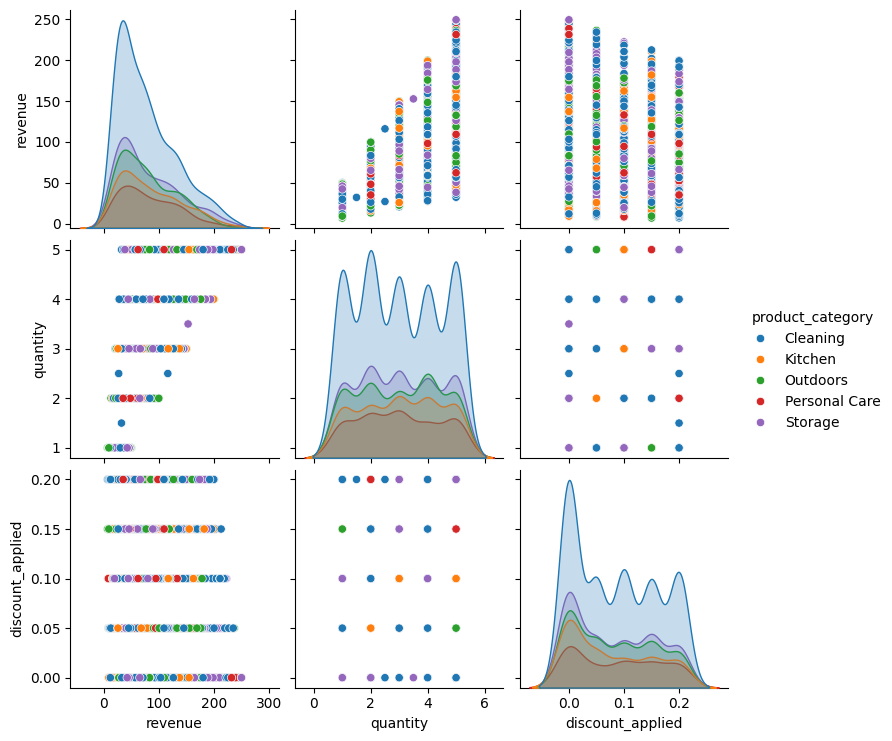

In [76]:
sns.pairplot(merged_df, x_vars=["revenue", "quantity", "discount_applied"], y_vars=["revenue", "quantity", "discount_applied"], hue="product_category")
plt.show()

Checking correlations between revenue, quantity and discount applied

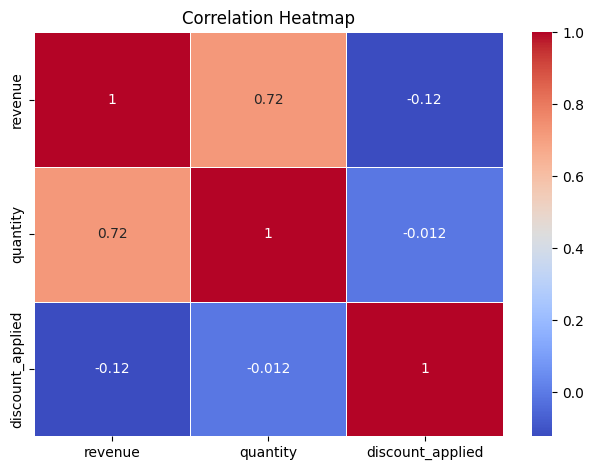

In [77]:
rev_quan_disc_corr = merged_df[["revenue", "quantity", "discount_applied"]].corr()
sns.heatmap(rev_quan_disc_corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Customer behaviour by loyalty tier measured by revenue brought in, quantity of overall goods sold, discounts applied, and quantity of each product category bought

In [81]:
customer_info_clean["loyalty_tier"].value_counts()

loyalty_tier
Gold       265
Silver     119
Bronze     114
Unknown      2
Name: count, dtype: int64

In [85]:
customer_behaviour_loyalty_revenue = merged_df.groupby("loyalty_tier", observed=False)["revenue"].agg(["min", "mean", "median", "max", "sum","count"])
customer_behaviour_loyalty_revenue["No. of customers"] = customer_info_clean["loyalty_tier"].value_counts()
customer_behaviour_loyalty_revenue["Orders per customer"] = customer_behaviour_loyalty_revenue["count"] / customer_behaviour_loyalty_revenue["No. of customers"]
customer_behaviour_loyalty_revenue["Ave Revenue per customer"] = customer_behaviour_loyalty_revenue["sum"] / customer_behaviour_loyalty_revenue["No. of customers"]

customer_behaviour_loyalty_revenue.reindex(index=["Bronze", "Silver", "Gold", "Unknown"])

,min,mean,median,max,sum,count,No. of customers,Orders per customer,Ave Revenue per customer
loyalty_tier,,,,,,,,,
Bronze,6.8000,78.268746,63.69900,249.15,49387.5785,631,114,5.535088,433.224373
Silver,7.8660,78.800034,65.12300,249.35,53426.4230,678,119,5.697479,448.961538
Gold,6.9615,81.534133,69.77075,248.30,136325.0710,1672,265,6.309434,514.434230
Unknown,39.3400,85.252556,73.29600,132.09,767.2730,9,2,4.500000,383.636500


In [87]:
customer_behaviour_loyalty_quantity = merged_df.groupby("loyalty_tier", observed=False)["quantity"].agg(["min", "mean", "median", "max", "sum","count"])
customer_behaviour_loyalty_quantity["Ave quantity per customer"] = customer_behaviour_loyalty_quantity["sum"] / customer_behaviour_loyalty_revenue["No. of customers"]
customer_behaviour_loyalty_quantity

,min,mean,median,max,sum,count,Ave quantity per customer
loyalty_tier,,,,,,,
Bronze,1.0,2.977021,3.0,5.0,1878.5,631,16.478070
Gold,1.0,3.004785,3.0,5.0,5024.0,1672,18.958491
Silver,1.0,3.003687,3.0,5.0,2036.5,678,17.113445
Unknown,2.0,3.666667,4.0,5.0,33.0,9,16.500000


In [88]:
customer_behaviour_loyalty_discount = merged_df.groupby("loyalty_tier", observed=False)["discount_applied"].agg(["min", "mean", "median", "max", "sum","count"])
customer_behaviour_loyalty_discount["Ave discount per customer"] = customer_behaviour_loyalty_discount["sum"] / customer_behaviour_loyalty_revenue["No. of customers"]
customer_behaviour_loyalty_discount

,min,mean,median,max,sum,count,Ave discount per customer
loyalty_tier,,,,,,,
Bronze,0.0,0.079081,0.05,0.2,49.90,631,0.437719
Gold,0.0,0.082237,0.05,0.2,137.50,1672,0.518868
Silver,0.0,0.087758,0.10,0.2,59.50,678,0.500000
Unknown,0.0,0.105556,0.15,0.2,0.95,9,0.475000


In [80]:
customer_behaviour_loyalty_products = merged_df.pivot_table(index="loyalty_tier", columns="product_category", values="order_id", aggfunc="count", observed=False)
customer_behaviour_loyalty_products.loc["total_products_bought"] = customer_behaviour_loyalty_products.sum()
customer_behaviour_loyalty_products["total_customers"] = customer_behaviour_loyalty_products.sum(axis=1)
customer_behaviour_loyalty_products

product_category,Cleaning,Kitchen,Outdoors,Personal Care,Storage,total_customers
loyalty_tier,,,,,,
Bronze,253,90,107,61,120,631
Gold,710,226,265,169,302,1672
Silver,235,86,135,68,154,678
Unknown,5,0,0,3,1,9
total_products_bought,1203,402,507,301,577,2990


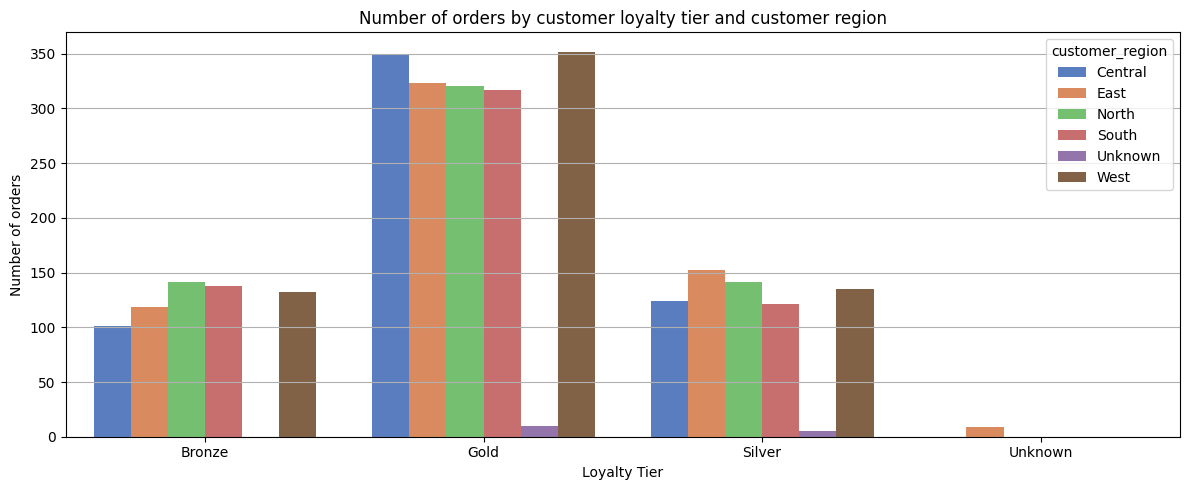

In [81]:
plt.figure(figsize=(12,5))
sns.countplot(merged_df, x="loyalty_tier", hue="customer_region", palette="muted")
plt.xlabel("Loyalty Tier")
plt.ylabel("Number of orders")
plt.grid(axis="y")
plt.title("Number of orders by customer loyalty tier and customer region")
plt.tight_layout()
plt.show()

Customer behaviour by signup month measured by revenue brought in, quantity of overall goods sold, and quantity of each product category bought

In [113]:
customer_behaviour_signup_revenue = merged_df.groupby("signup_month", observed=False)["revenue"].agg(["min", "mean", "median", "max", "sum","count"])
customer_behaviour_signup_revenue["No. of customers"] = customer_info_clean["signup_month"].value_counts()
customer_behaviour_signup_revenue["Orders per customer"] = customer_behaviour_signup_revenue["count"] / customer_behaviour_signup_revenue["No. of customers"]
customer_behaviour_signup_revenue["Ave Revenue per customer"] = customer_behaviour_signup_revenue["sum"] / customer_behaviour_signup_revenue["No. of customers"]

customer_behaviour_signup_revenue

,min,mean,median,max,sum,count,No. of customers,Orders per customer,Ave Revenue per customer
signup_month,,,,,,,,,
2024-07,7.9920,79.818724,68.2560,246.9000,17639.9380,221,36,6.138889,489.998278
2024-08,7.5040,85.669690,76.3835,249.3500,24158.8525,282,50,5.640000,483.177050
2024-09,8.3385,77.840469,64.9080,243.8000,18603.8720,239,42,5.690476,442.949333
2024-10,8.7685,81.742949,70.5600,244.6000,22479.3110,275,50,5.500000,449.586220
2024-11,6.9615,80.732564,71.0280,221.1600,22039.9900,273,45,6.066667,489.777556
2024-12,6.8480,75.549548,56.8195,237.1000,21456.0715,284,47,6.042553,456.512160
2025-01,7.7945,74.970334,62.7700,213.1000,17842.9395,238,41,5.804878,435.193646
2025-02,7.8660,85.205417,74.9400,248.3000,24113.1330,283,44,6.431818,548.025750
2025-03,8.2080,82.598365,71.8560,247.5500,19906.2060,241,37,6.513514,538.005568


In [104]:
customer_behaviour_signup_revenue.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 13 entries, 2024-07 to 2025-07
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   min     13 non-null     float64
 1   mean    13 non-null     float64
 2   median  13 non-null     float64
 3   max     13 non-null     float64
 4   sum     13 non-null     float64
 5   count   13 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 728.0 bytes


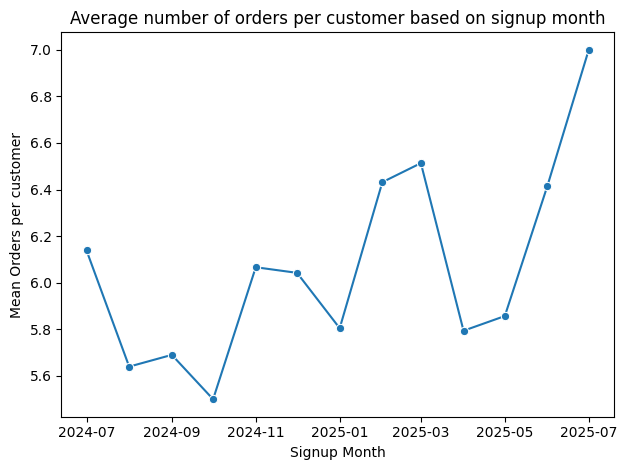

In [121]:
df_plot = customer_behaviour_signup_revenue.copy()
df_plot.index = df_plot.index.to_timestamp()
sns.lineplot(x=df_plot.index, y="Orders per customer", data=df_plot, marker='o')
plt.xlabel("Signup Month")
plt.ylabel("Mean Orders per customer")
plt.title("Average number of orders per customer based on signup month")
plt.tight_layout()
plt.show()

<Axes: ylabel='Orders per customer'>

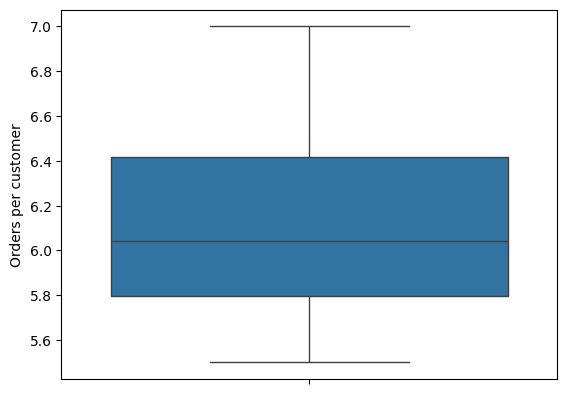

In [ ]:
sns.boxplot(df_plot["Orders per customer"]) # outlier?

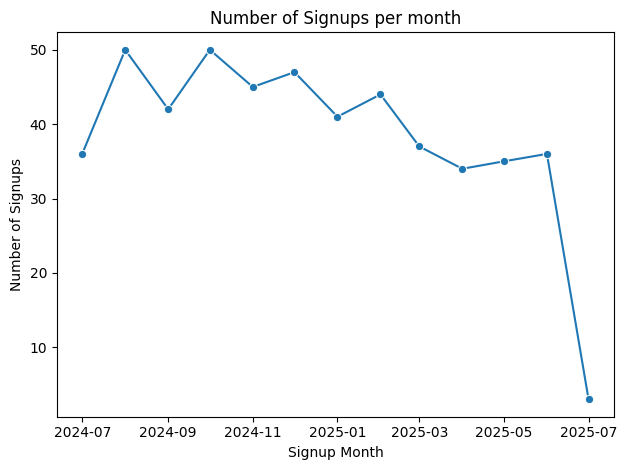

In [119]:
sns.lineplot(x=df_plot.index, y="No. of customers", data=df_plot, marker='o')
plt.xlabel("Signup Month")
plt.ylabel("Number of Signups")
plt.title("Number of Signups per month")
plt.tight_layout()
plt.show()

<Axes: xlabel='signup_month', ylabel='Orders per customer'>

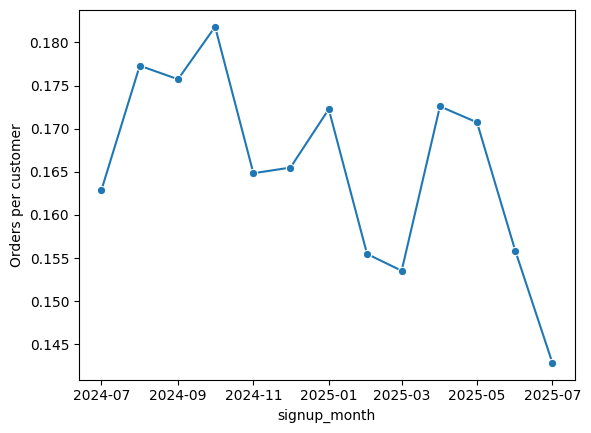

In [ ]:
sns.lineplot(x=df_plot.index, y=1/df_plot["Orders per customer"], data=df_plot, marker='o') # inverse relationship?

In [83]:
customer_behaviour_signup_quantity = merged_df.groupby("signup_month", observed=False)["quantity"].agg(["min", "mean", "median", "max", "sum","count"])
customer_behaviour_signup_quantity

,min,mean,median,max,sum,count
signup_month,,,,,,
2024-07,1.0,2.889140,3.0,5.0,638.5,221
2024-08,1.0,3.095745,3.0,5.0,873.0,282
2024-09,1.0,3.025105,3.0,5.0,723.0,239
2024-10,1.0,3.000000,3.0,5.0,825.0,275
2024-11,1.0,2.976190,3.0,5.0,812.5,273
2024-12,1.0,2.862676,3.0,5.0,813.0,284
2025-01,1.0,2.865546,3.0,5.0,682.0,238
2025-02,1.0,3.146643,3.0,5.0,890.5,283
2025-03,1.0,3.033195,3.0,5.0,731.0,241


In [84]:
customer_behaviour_signup_products = merged_df.pivot_table(index="signup_month", columns="product_category", values="order_id", aggfunc="count", observed=False)
customer_behaviour_signup_products

product_category,Cleaning,Kitchen,Outdoors,Personal Care,Storage
signup_month,,,,,
2024-07,84,27,48,19,43
2024-08,122,39,53,25,43
2024-09,92,40,36,28,43
2024-10,99,37,55,23,61
2024-11,112,36,48,29,48
2024-12,107,47,44,28,58
2025-01,102,29,31,35,41
2025-02,113,38,41,36,55
2025-03,99,26,46,26,44


Delivery performance by price band and region

In [85]:
delivery_performance_priceband = merged_df.pivot_table(values="order_id", index="delivery_status", columns="price_band", aggfunc="count", observed=False)
delivery_performance_priceband

price_band,Low,Medium,High
delivery_status,,,
Cancelled,108,219,262
Delayed,188,437,545
Delivered,193,455,580
Unknown,1,0,2


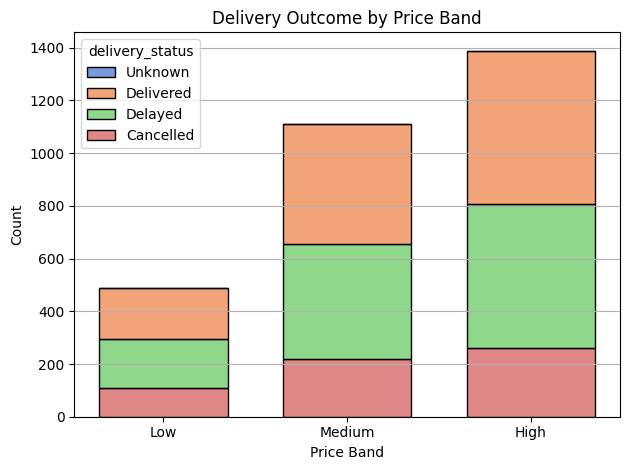

In [86]:
temp = delivery_performance_priceband.sort_index(ascending=False) # to put unknowns at the top

sns.histplot(merged_df, x="price_band", hue="delivery_status", multiple="stack", hue_order=temp.index, discrete=True, shrink=0.7, palette="muted")
plt.xlabel("Price Band")
plt.grid(axis="y")
plt.title("Delivery Outcome by Price Band")
plt.tight_layout()
plt.show()

In [87]:
delivery_performance_region = merged_df.pivot_table(values="order_id", index="delivery_status", columns="order_region", aggfunc="count", observed=False)
delivery_performance_region

order_region,Central,East,North,South,West
delivery_status,,,,,
Cancelled,125,98,117,116,133
Delayed,235,251,236,231,217
Delivered,241,251,250,248,238
Unknown,1,1,1,0,0


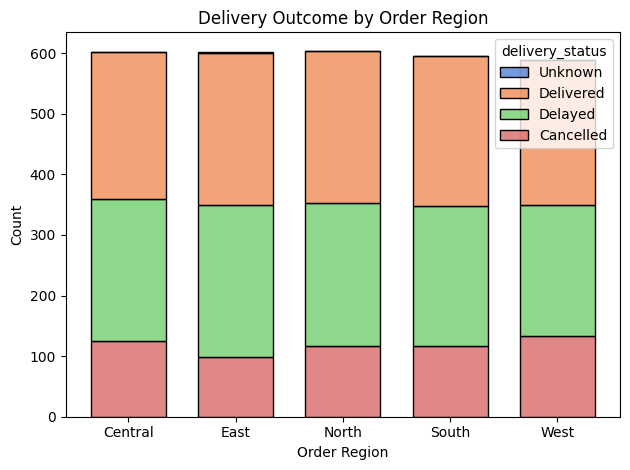

In [88]:
sns.histplot(merged_df, x="order_region", hue="delivery_status", multiple="stack", hue_order=temp.index, discrete=True, shrink=0.7, palette="muted")
plt.xlabel("Order Region")
plt.title("Delivery Outcome by Order Region")
plt.tight_layout()
plt.show()

In [89]:
late_delivery_region = merged_df.pivot_table(values="order_id", index="order_region", columns="is_late", aggfunc="count", observed=False)
late_delivery_region["Late Proportion"] = late_delivery_region.loc[:,"True"]/late_delivery_region.sum(axis=1)
late_delivery_region

is_late,False,True,Late Proportion
order_region,,,
Central,367,235,0.390365
East,350,251,0.417637
North,368,236,0.390728
South,364,231,0.388235
West,371,217,0.369048


Payment methods by loyalty tier

In [90]:
payment_method_by_loyalty = merged_df.pivot_table(values="order_id", index="loyalty_tier", columns="payment_method", aggfunc="count", observed=False)
payment_method_by_loyalty

payment_method,Bank Transfer,Credit Card,Paypal,Unknown
loyalty_tier,,,,
Bronze,180,287,164,0
Gold,404,840,426,2
Silver,194,318,165,1
Unknown,0,6,3,0
